<a href="https://colab.research.google.com/github/anamumaq/nulidad-elecciones-keikino/blob/main/Pedidos_de_nulidad_elecciones_2021_Keikino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# URL del gsheet

url = "https://docs.google.com/spreadsheets/d/1z67kss75Zhg0sGT0R-WOuqFvyTI-ehJxjFKyy1WUqM8/edit#gid=0"

# Edit link to dowload the gsheet

url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df = pd.read_csv(url)

In [ ]:
# Last update
df.iloc[1,0]


'Última actualización: 11.06.21 a las 11:58pm'

In [ ]:
# formating the dataset
df = df.drop([0,1,2,4,38], axis = 0)
df = df.set_axis (df.iloc[0,], axis = "columns")
df = df.drop(3, axis = 0)


In [ ]:
df.dtypes

3
Juzgados                          object
Pedidos de nulidad presentados    object
Resueltos                         object
Pendientes                        object
Fundados                          object
Infundados                        object
Improcedentes                     object
Observaciones                     object
dtype: object

In [ ]:
# Replace NaN from origen
df = df.replace(to_replace = np.nan, value =0)

In [ ]:
# Set types
df['Juzgados'] = df['Juzgados'].astype(str)
df['Pedidos de nulidad presentados'] = df['Pedidos de nulidad presentados'].astype(int)
df['Resueltos'] = df['Resueltos'].astype(int)
df['Pendientes'] = df['Pendientes'].astype(int)
df['Fundados'] = df['Fundados'].astype(int)
df['Infundados'] = df['Infundados'].astype(int)
df['Improcedentes'] = df['Improcedentes'].astype(int)
df['Observaciones'] = df['Observaciones'].astype(str)


In [ ]:
# Replace large name of Juzgado with the same meaning
df['Juzgados'] = df['Juzgados'].str.replace('Juzgado Electoral Especial de', '')
df['Juzgados'] = df['Juzgados'].str.replace('Jurado Electoral Especial de', '')
df['Juzgados'] = df['Juzgados'].str.replace('JEE', '')


In [ ]:
# Change for a better name xd
df =  df.rename( columns= {'Pedidos de nulidad presentados':'Pedidos'} )

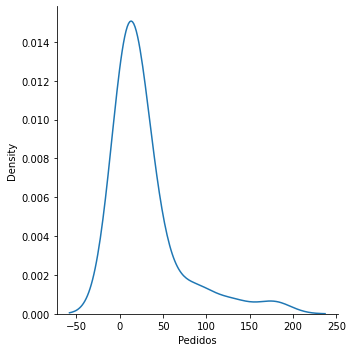

In [ ]:
# how are distrib my pedidos
#ax = plt.subplots(figsize = (8,6))
g = sns.displot(df, x = "Pedidos", kind = "kde")
#g.set_title('Distrib de los Pedidos de Nulidades)',fontsize =15)
#g.set_xlabel('#Pedidos',fontsize=10)
#g.set_ylabel('Densidad',fontsize=10)


In [ ]:
# in order to put labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

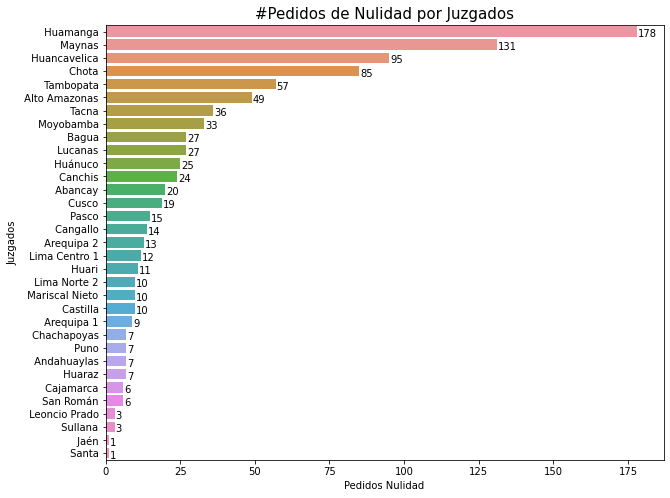

In [ ]:
# Plot pedidos por juzgados sorted

ax = plt.subplots(figsize = (10,8))
g = sns.barplot(data = df, y = 'Juzgados', x = 'Pedidos', order = df.sort_values('Pedidos', ascending = False).Juzgados)
g.axes.set_title('#Pedidos de Nulidad por Juzgados',fontsize =15)
g.set_xlabel('Pedidos Nulidad',fontsize=10)
g.set_ylabel('Juzgados',fontsize=10)
show_values_on_bars(g, "h", 0.3)

In [ ]:
# Creating new variable %resolucion

df['p_resol'] = round((df['Resueltos']/ df['Pedidos'])*100,1)

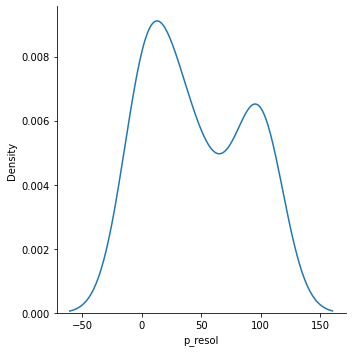

In [ ]:
# how is distrb % resol

#ax = plt.subplots(figsize = (8,6))
g = sns.displot(df, x="p_resol", kind="kde")
#g.axes.set_title('Distrib de %Resoluciones)',fontsize =15)
#g.set_xlabel('%Resolu',fontsize=10)
#g.set_ylabel('Densidad',fontsize=10)


In [ ]:
# Pedidos with zero %resolucion

df_cero = df[df['p_resol'] == 0]

In [ ]:
# plot juzgados with zero %resolucion
df_cero[{'Juzgados','p_resol'}]

3,p_resol,Juzgados
5,0.0,Abancay
9,0.0,Arequipa 2
15,0.0,Chachapoyas
23,0.0,Jaén
29,0.0,Maynas
30,0.0,Moyobamba
37,0.0,Tambopata


In [ ]:
# Pedidos with 100% resolucion

df_cien = df[df['p_resol'] == 100]

In [ ]:
df_cien[{'Juzgados','p_resol'}]

3,p_resol,Juzgados
10,100.0,Bagua
11,100.0,Cajamarca
14,100.0,Castilla
20,100.0,Huánuco
24,100.0,Leoncio Prado
26,100.0,Lima Norte 2
34,100.0,Santa
35,100.0,Sullana
36,100.0,Tacna


In [ ]:
# Pedidos in progress

df = df[df['p_resol'] != 0]
df = df[df['p_resol'] != 100]

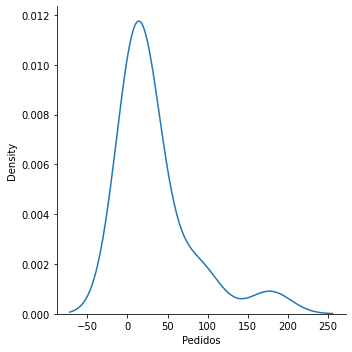

In [ ]:
# how is distrb #pedidos of pedidos in progress

sns.displot(df, x="Pedidos", kind = "kde")

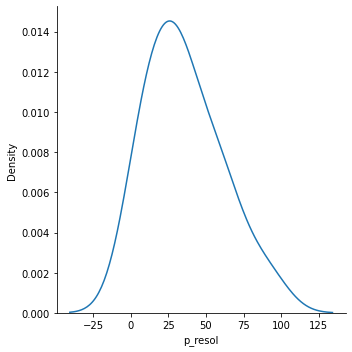

In [ ]:
# how is distrb %resol of pedidos in progress
sns.displot(df, x="p_resol", kind= "kde")

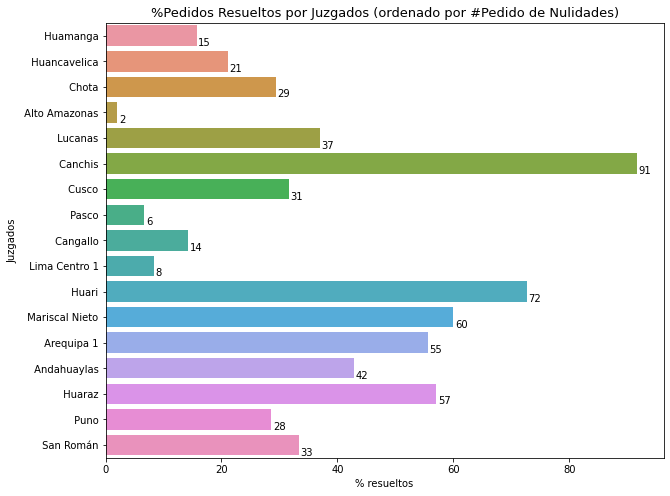

In [ ]:
# Plot Juzgados with Pedidos de nulidad in porgress

ax = plt.subplots(figsize = (10,8))
g = sns.barplot(data = df, y = 'Juzgados', x = 'p_resol', order = df.sort_values('Pedidos', ascending = False).Juzgados)
g.axes.set_title('%Pedidos Resueltos por Juzgados (ordenado por #Pedido de Nulidades)',fontsize =13)
g.set_xlabel('% resueltos',fontsize=10)
g.set_ylabel('Juzgados',fontsize=10)
show_values_on_bars(g, "h", 0.3)